In [2]:
import numpy as np
X=2*np.random.rand(100,1)
y=4+3*X+np.random.rand(100,1)
print("La longitud de datos es:", len(x))

La longitud de datos es: 100


**2. VISUALIZACIÓN DE CONJUNTO DE DATOS**

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

<function matplotlib.pyplot.show(close=None, block=None)>

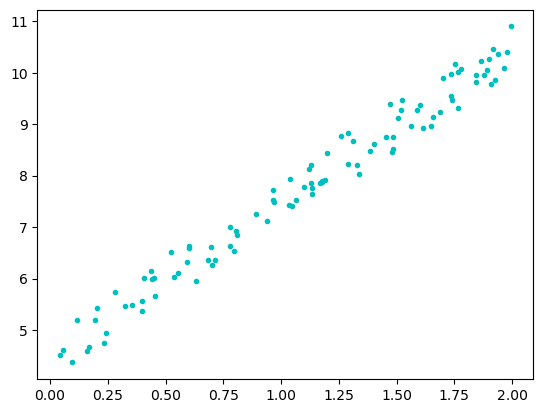

In [4]:
plt.plot(X,y,"c.")
plt.show

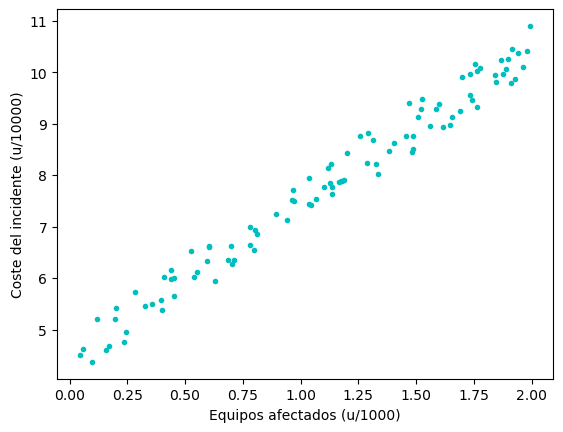

In [5]:
plt.plot(X,y,"c.")
plt.xlabel("Equipos afectados (u/1000)")
plt.ylabel("Coste del incidente (u/10000)")
plt.show()

**3. MODIFICACIÓN DEL CONJUNTO DE DATOS**

In [6]:
import pandas as pd

In [7]:
data = {'n_equipos_afectados': X.flatten(),'coste':y.flatten()}
df = pd.DataFrame(data)
df.head(10)

,n_equipos_afectados,coste
0,1.963722,10.091917
1,1.037839,7.935765
2,1.176169,7.890675
3,1.616213,8.925243
4,1.100327,7.774957
5,1.867123,10.235944
6,0.355056,5.492170
7,1.130527,8.214208
8,0.281500,5.730247
9,0.523604,6.523599


In [11]:
#Escalar
df['n_equipos_afectados']=df['n_equipos_afectados']*1000
df['n_equipos_afectados']=df['n_equipos_afectados'].astype('int')
df['coste']=df['coste']*10000
df['coste']=df['coste'].astype('int')
df.head(10)

,n_equipos_afectados,coste
0,1963,100919
1,1037,79357
2,1176,78906
3,1616,89252
4,1100,77749
5,1867,102359
6,355,54921
7,1130,82142
8,281,57302
9,523,65235


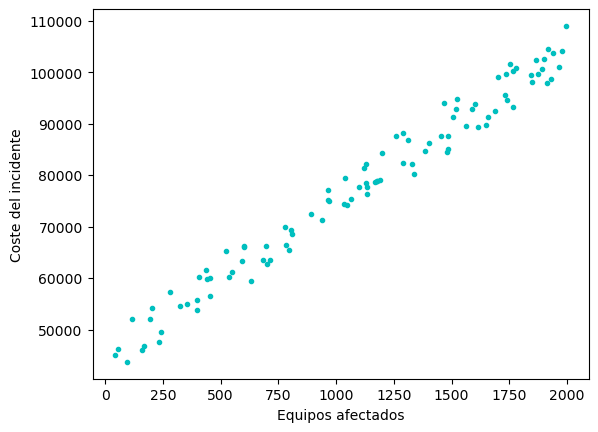

In [14]:
#Mostrar el dataset
plt.plot(df['n_equipos_afectados'],df['coste'],"c.")
plt.xlabel("Equipos afectados")
plt.ylabel("Coste del incidente")
plt.show()

**4. CONSTRUCCION DEL MODELO**

In [15]:
from sklearn.linear_model import LinearRegression

In [18]:
##Construir el modelo y vamos a ajustar la función
#Crear una instancia del modelo lineal
lin_reg = LinearRegression()
#resahpe(-1,1):Convierta un arreglo unidimensional en una matriz con una sola suma
#fit ajusta el modelo de regresión lineal a los datos
lin_reg.fit(df['n_equipos_afectados'].values.reshape(-1,1),df['coste'].values)

LinearRegression()

In [19]:
#Parametro de Theta 0 
#Corte en el eje x
lin_reg.intercept_

44838.94190177986

In [20]:
#Parametro de theta 1
#La pendiente del modelo
lin_reg.coef_

array([29.85461677])

In [23]:
#Obtener el mínimo y el máximo de nuestra función 
X_min_max=np.array([[df['n_equipos_afectados'].min()],[df['n_equipos_afectados'].max()]])
y_train_pred=lin_reg.predict(X_min_max)

Text(0, 0.5, 'Coste')

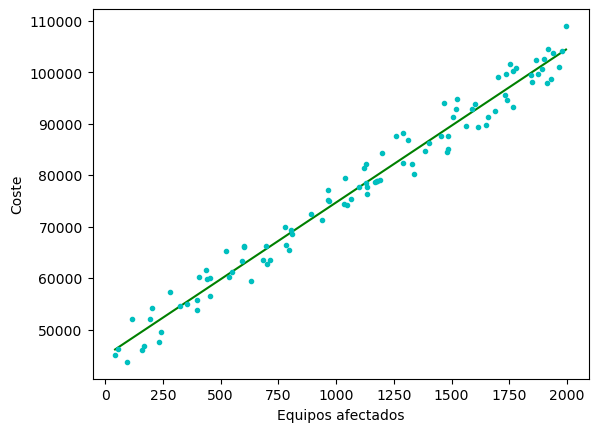

In [24]:
plt.plot(X_min_max,y_train_pred,"g-")
plt.plot(df['n_equipos_afectados'],df['coste'],"c.")
plt.xlabel("Equipos afectados")
plt.ylabel("Coste")

**5. PREDICCIÓN DE NUEVOS EJEMPLOS**

In [25]:
x_new = np.array([[1300]])
#prediccion 
coste = lin_reg.predict(x_new)
print("El coste del incidente sería:", int(coste[0]), "Euros")

El coste del incidente sería: 83649 Euros


Text(0, 0.5, 'Coste')

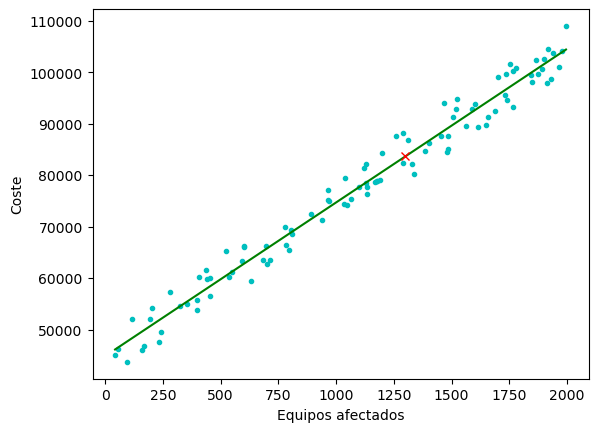

In [28]:
plt.plot(df['n_equipos_afectados'],df['coste'],"c.")
plt.plot(X_min_max,y_train_pred,"g-")
plt.plot(x_new, coste,"rx")
plt.xlabel("Equipos afectados")
plt.ylabel("Coste")